In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
%matplotlib inline

In [3]:
provider = IBMQ.load_account()

In [4]:
q = QuantumRegister(9)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [5]:
qc.x(q[5])
qc.h(q[0:6])
qc.barrier(q)

In [6]:
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])  
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [7]:
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)

In [8]:
qc.measure(q[0:5], c[0:5])

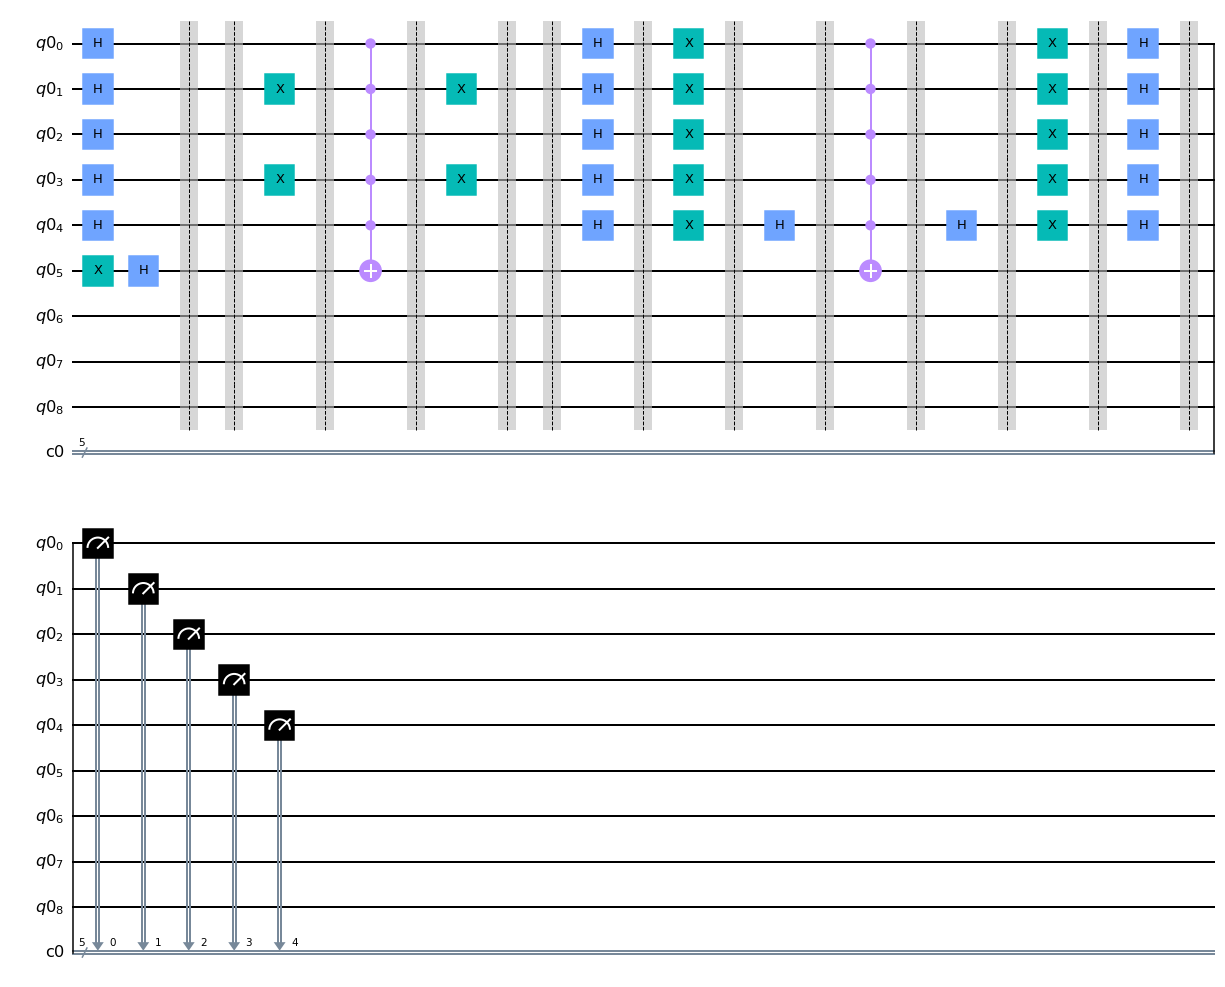

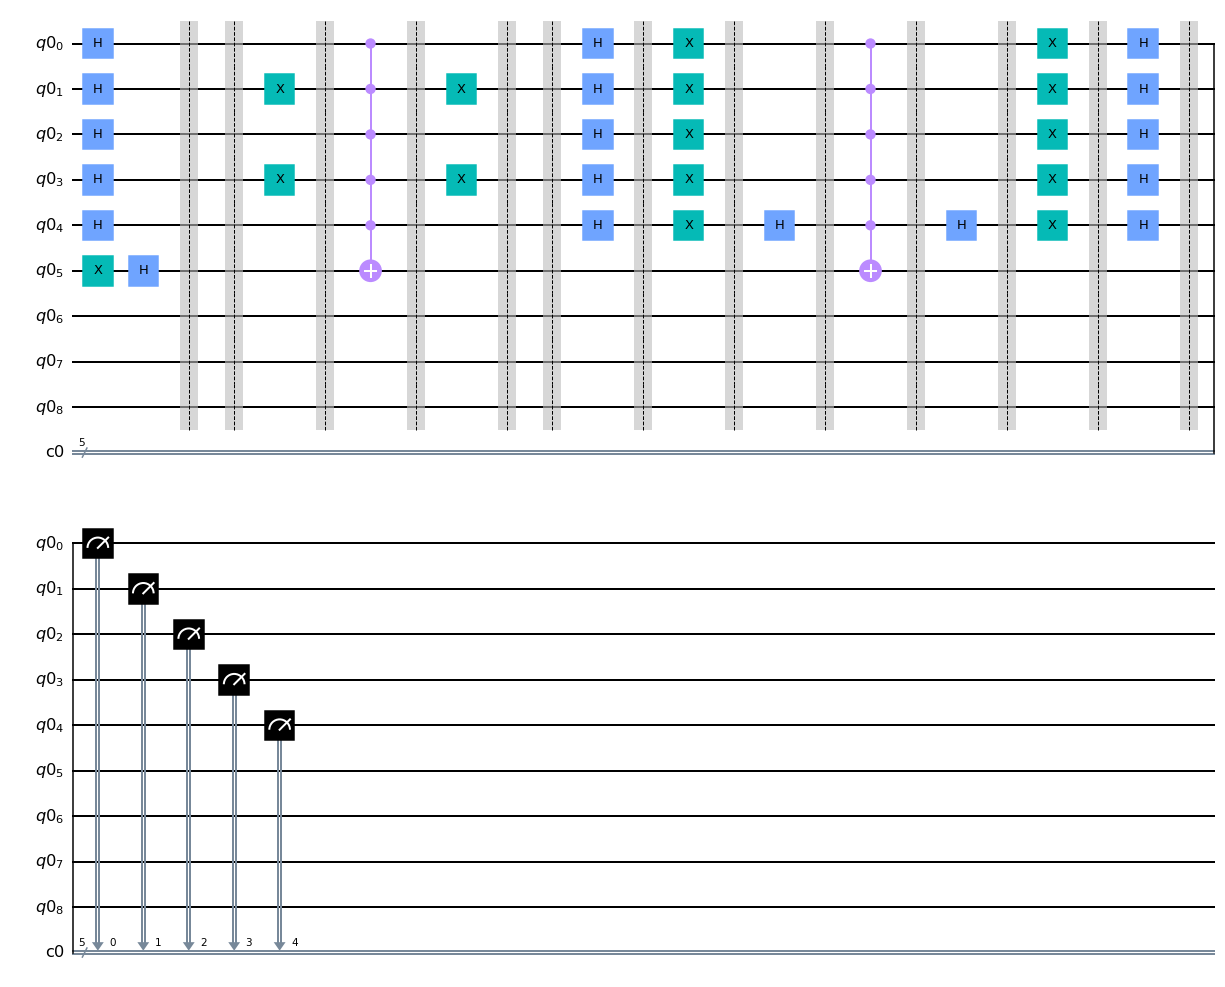

In [9]:
qc.draw(output='mpl')

In [10]:

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)

result = job.result()
count = result.get_counts()
print(count)

{'11011': 186, '01100': 324, '00110': 317, '11000': 170, '10111': 192, '00101': 288, '01001': 317, '11010': 153, '11001': 185, '00100': 319, '00011': 323, '01111': 298, '00010': 318, '11110': 163, '11100': 180, '10000': 194, '10101': 2344, '10010': 151, '10110': 181, '11111': 158, '00111': 276, '10100': 192, '11101': 185, '01000': 305, '01010': 294, '10001': 166, '01110': 314, '00000': 332, '01011': 328, '10011': 182, '01101': 338, '00001': 327}


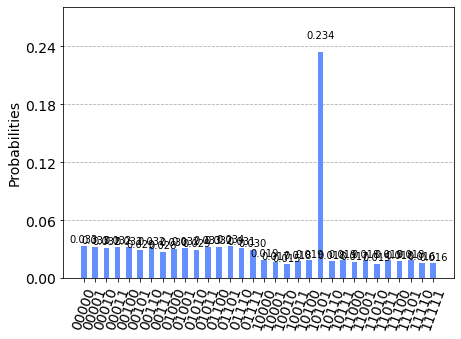

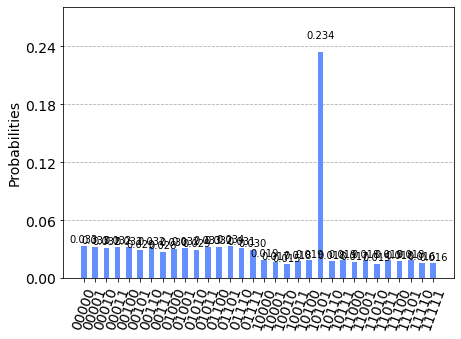

In [11]:
plot_histogram(count)